In [1]:
!pip install -U gensim

In [2]:
with open('/content/drive/MyDrive/SudoCode/Week 1 - Text Embeddings/viwik19.txt', encoding='utf-16') as f:
    data = f.read()

In [3]:
print(len(data))

72317211


In [4]:
data[:200]

'trang chính  internet society  internet society hay isoc là một tổ chức quốc tế hoạt động phi lợi nhuận phi chính phủ và bao gồm các thành viên có trình độ chuyên ngành tổ chức này chú trọng đến tiêu '

In [5]:
 from nltk import sent_tokenize, word_tokenize

In [6]:

  >>> import nltk
  >>> nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [7]:
tokens = word_tokenize(data)

In [8]:
tokens[:5]

['trang', 'chính', 'internet', 'society', 'internet']

In [9]:
from gensim.models import Word2Vec


In [10]:
sentences = [tokens]

In [11]:
model = Word2Vec(
    sentences,
    vector_size=100,
    window=5,
    min_count=5,
    sg=1,
    workers=4,
    epochs=10,
    compute_loss=True   # ✅ enable loss tracking
)

In [12]:
model.build_vocab(sentences)

In [13]:
model.train(
        sentences,
        total_examples=model.corpus_count,
        epochs=10
)

(100000, 158321740)

In [14]:
embedding_matrix = model.wv.vectors

print("Embedding matrix shape:", embedding_matrix.shape)

Embedding matrix shape: (27617, 100)


In [15]:
word_to_index = {word: idx for idx, word in enumerate(model.wv.index_to_key)}

In [16]:
print(model.wv.index_to_key[:30])  # first 30 tokens

['một', 'không', 'và', 'của', 'là', 'các', 'năm', 'hai', 'có', 'trong', 'được', 'chín', 'người', 'với', 'ba', 'cho', 'đã', 'thành', 'những', 'bốn', 'tám', 'từ', 'ở', 'sáu', 'bảy', 'này', 'vào', 'quốc', 'nam', 'công']


In [17]:
#Gemini Display the embeddings for the first 5 words in the vocabulary
for i, word in enumerate(list(word_to_index.keys())[:5]):
    print(f"Embedding for '{word}':")
    display(embedding_matrix[word_to_index[word]])

Embedding for 'một':


array([ 0.00350239, -0.62210846, -0.4926572 ,  0.5858125 , -0.7007694 ,
        0.07437699,  0.1886458 ,  0.75673246, -0.15732835,  0.05443705,
        0.39601508,  0.41706398, -0.16759293, -0.24416958,  0.05248348,
       -0.11401793,  0.6942635 , -0.9375662 , -0.71807474, -0.33636752,
        0.0172675 , -0.08753575, -0.5674355 , -0.7283653 , -0.05564255,
       -0.33600345, -0.06877654, -0.20766917, -0.08976454, -0.22282891,
        0.9135598 ,  0.71943146,  0.44477388, -0.11044101, -0.44968817,
        0.6311258 , -0.30938047,  0.0264007 ,  0.04762374, -0.24425778,
        0.07022332, -0.19993435,  0.19547847, -0.25311846, -0.22022462,
       -0.23776959, -0.55216604, -0.53717464, -0.18045375, -0.01268925,
       -0.24524482, -0.11081384,  0.1941427 , -0.0417763 ,  0.23761156,
       -0.07027346,  0.15361491, -0.6726293 ,  0.40015182, -0.05604372,
        0.27815998, -0.3414049 ,  0.5961058 , -0.31166914, -0.35150525,
       -0.28382277,  0.05412106,  0.6012357 , -1.0015736 , -0.52

Embedding for 'không':


array([ 0.00866943, -0.59077525, -0.63812274,  0.4916343 , -0.5995086 ,
        0.17382683,  0.1433538 ,  0.8304848 , -0.07385606,  0.16727214,
        0.3726638 ,  0.4009967 ,  0.01279021, -0.11386234,  0.01271985,
       -0.12235627,  0.7213038 , -1.0720452 , -0.6877161 , -0.35699788,
        0.01812399, -0.05803733, -0.5588722 , -0.72912496, -0.08386474,
       -0.386907  , -0.11588424, -0.2642853 , -0.06828955, -0.33926812,
        1.1397853 ,  0.8083817 ,  0.51531714, -0.13123243, -0.48454106,
        0.64471275, -0.28766763,  0.188415  ,  0.21962708, -0.38420215,
        0.00208333, -0.11565313,  0.1593759 , -0.29528883, -0.36144263,
       -0.16196528, -0.51777595, -0.47428802, -0.21821278, -0.02057208,
       -0.22336456, -0.02506376,  0.1836431 ,  0.05862397,  0.37283957,
       -0.13647395,  0.25604615, -0.73428196,  0.4310087 , -0.08723598,
        0.2370117 , -0.27800283,  0.61398256, -0.25567213, -0.41095215,
       -0.47373706, -0.03621369,  0.49113935, -1.1221616 , -0.57

Embedding for 'và':


array([-0.14945789, -0.2771389 , -0.39053294,  0.43308634, -0.41680115,
       -0.20286046,  0.25637516,  0.8044934 , -0.42599544,  0.1585415 ,
        0.12027329, -0.01901742, -0.18624997, -0.16204785,  0.12483987,
       -0.33226025,  0.49118653, -0.60819113, -0.53999203, -0.15235186,
        0.17857789,  0.04739989, -0.2196953 , -0.5496623 ,  0.10567404,
       -0.12251958, -0.13726512, -0.1534842 , -0.0290728 , -0.19750312,
        0.8489731 ,  0.5353888 ,  0.2430476 , -0.02899693, -0.16385792,
        0.7337364 , -0.27980813, -0.00317537,  0.14251277, -0.5144641 ,
        0.04411734, -0.2541762 ,  0.0859844 ,  0.02198192, -0.06240918,
       -0.28455558, -0.3711718 , -0.27592438, -0.03521987, -0.09026978,
       -0.22088724, -0.2380333 ,  0.24816865, -0.06563673,  0.03108541,
       -0.09476452,  0.01000492, -0.3512288 ,  0.26467076,  0.0293641 ,
        0.2454474 , -0.27540478,  0.44504538, -0.2551262 , -0.426196  ,
       -0.32192186,  0.10201403,  0.7563393 , -1.0493718 , -0.14

Embedding for 'của':


array([-0.23981619, -0.3529752 , -0.4192313 ,  0.66228426, -0.51820683,
       -0.33513185,  0.28892502,  0.8599071 , -0.622893  , -0.13941547,
        0.17831072, -0.03070275, -0.29512072, -0.14130089,  0.30154204,
       -0.4344594 ,  0.6064463 , -0.73923194, -0.6953568 , -0.2255132 ,
        0.17792447, -0.03602744, -0.47543705, -0.5235204 ,  0.04862975,
       -0.10012035, -0.19365656, -0.18247037, -0.14447981, -0.12582536,
        0.71941364,  0.62880796,  0.15242243, -0.09717427, -0.20948572,
        0.74647295, -0.16686359, -0.17579217, -0.13363265, -0.62117976,
       -0.02762119, -0.2927945 ,  0.1714161 , -0.01883857, -0.07406488,
       -0.30832362, -0.28633413, -0.52049726, -0.13556594,  0.05290392,
       -0.15148215, -0.35170758,  0.29340652, -0.3004082 , -0.07695436,
       -0.11640721,  0.07517098, -0.43883443,  0.2561966 ,  0.09055486,
        0.44178307, -0.37884152,  0.42301646, -0.45526183, -0.3772679 ,
       -0.05389263,  0.02428074,  0.84247196, -1.0615383 , -0.18

Embedding for 'là':


array([-0.1876212 , -0.34660566, -0.52939767,  0.7190926 , -0.63747036,
       -0.21829207,  0.36836842,  0.90588695, -0.5757915 ,  0.07603461,
        0.39344612,  0.11832949, -0.26768637,  0.00719321,  0.10586012,
       -0.2171244 ,  0.65598005, -0.7894506 , -0.5459638 , -0.36045057,
        0.1808083 , -0.1804937 , -0.26812717, -0.48035154, -0.08412939,
       -0.13197358, -0.21654797, -0.23001109, -0.14628527, -0.07520433,
        0.9644062 ,  0.7112082 ,  0.43345228,  0.01171776, -0.2791914 ,
        0.7897883 , -0.20575646,  0.04168101, -0.10509823, -0.55999595,
        0.06394797, -0.32116672,  0.12873986,  0.05389453, -0.04817148,
       -0.18935405, -0.435697  , -0.47810158, -0.13753095, -0.03498936,
       -0.23615704, -0.20197424,  0.21351239, -0.08799529,  0.12182201,
       -0.14117084, -0.02367177, -0.41157308,  0.17975341,  0.1006674 ,
        0.23309356, -0.44956145,  0.5350622 , -0.3247091 , -0.65012693,
       -0.20266868,  0.0940873 ,  0.79408   , -1.1198021 , -0.30

In [18]:
model.wv.most_similar('một')

[('hai', 0.9864614009857178),
 ('đến', 0.9856414198875427),
 ('ba', 0.9843888282775879),
 ('người', 0.9836935997009277),
 ('không', 0.9833913445472717),
 ('bốn', 0.9827571511268616),
 ('tuổi', 0.9786534309387207),
 ('bảy', 0.9773358702659607),
 ('sáu', 0.9752225279808044),
 ('tổng', 0.9743495583534241)]

In [19]:
model.wv.most_similar(positive=['nam', 'nữ'], negative=['bé'])

[('nằm', 0.9817094802856445),
 ('lại', 0.9789533615112305),
 ('thì', 0.9780063033103943),
 ('lan', 0.9774901866912842),
 ('michigan', 0.9755825400352478),
 ('đây', 0.9749459624290466),
 ('oresund', 0.9744448065757751),
 ('biên', 0.9733132123947144),
 ('đưa', 0.973264217376709),
 ('á', 0.9723911285400391)]

In [20]:
word_freq = {word: model.wv.get_vecattr(word, "count") for word in model.wv.index_to_key}

# Top 10 most frequent
top10 = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:10]
print(top10)

[('một', 402666), ('không', 267433), ('và', 254769), ('của', 232454), ('là', 201142), ('các', 190642), ('năm', 190306), ('hai', 167890), ('có', 154689), ('trong', 149428)]


In [21]:
import pandas as pd

words = ["một", "hai", "ba"]
embeddings = [model.wv[w] for w in words if w in model.wv]

df = pd.DataFrame(embeddings, index=words)
display(df.head())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
một,0.003502,-0.622108,-0.492657,0.585813,-0.700769,0.074377,0.188646,0.756732,-0.157328,0.054437,...,0.024930,0.257031,0.380493,0.33125,-0.399923,0.067085,-0.172683,0.035622,0.984056,-0.099315
hai,-0.007325,-0.618528,-0.593247,0.505614,-0.645769,0.172528,0.072302,0.729002,-0.007299,0.173517,...,-0.035071,0.318897,0.446949,0.33745,-0.419282,0.048181,-0.281735,0.023733,1.028488,-0.075297
ba,-0.006795,-0.568002,-0.498336,0.424029,-0.567228,0.125890,0.105262,0.707073,-0.023990,0.199273,...,-0.036810,0.313217,0.462615,0.26801,-0.359894,0.017074,-0.237321,0.068409,0.966831,-0.128901


In [26]:
import random
words = list(model.wv.index_to_key)

# Select 10 random words
random_words = random.sample(words, 10)
random_words

['olympia',
 'against',
 'hearst',
 'tuýp',
 'ability',
 'blaine',
 'amiral',
 'preobrazhenskoe',
 'plot',
 'việp']

In [34]:
embeddings = [model.wv[w] for w in random_words if w in model.wv]

df = pd.DataFrame(embeddings, index=random_words)
display(df)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
olympia,-0.002607,-0.003677,-0.004018,0.007951,-0.008605,0.000287,-0.003149,0.004970,-0.006776,0.005527,...,-0.000480,-0.002611,0.004575,-0.003510,-0.004072,-0.004628,-0.001862,-0.001696,0.002362,-0.003606
against,-0.009967,-0.007643,0.004602,0.000521,0.003785,-0.001349,-0.003438,0.004291,0.004468,0.003002,...,-0.009964,0.004691,0.008370,0.000709,0.006238,0.003937,0.001491,-0.002045,-0.005886,-0.006449
hearst,-0.003125,0.009750,-0.001731,0.007303,0.002016,0.003446,0.002105,0.008277,-0.007070,-0.002480,...,0.000783,-0.006759,0.004881,-0.001818,0.007181,0.005835,0.003559,-0.009807,-0.007202,-0.006572
tuýp,0.005596,0.007377,0.009056,0.005736,-0.009418,0.008635,0.002018,0.000165,-0.008882,0.009159,...,-0.000595,0.000114,-0.003915,0.009779,0.009553,0.004026,0.005679,-0.006388,-0.000230,0.003119
ability,0.009945,0.004033,0.009307,-0.009299,0.003471,-0.000644,0.006047,0.003008,-0.007457,-0.004182,...,0.000355,-0.008300,0.006004,0.004647,0.009110,0.004154,0.001491,-0.001463,0.006826,0.002105
blaine,0.004178,-0.006896,-0.007442,0.004260,0.008697,-0.004273,-0.005074,0.001846,-0.006343,-0.002935,...,0.006112,-0.005127,0.000953,0.002544,-0.005367,-0.007270,-0.005845,-0.004661,-0.001139,-0.001240
amiral,-0.000144,0.001471,-0.005547,0.008115,0.004213,-0.007777,0.007686,0.005261,-0.009302,0.003383,...,0.005043,-0.008660,-0.004592,0.007984,0.002311,0.001753,-0.009300,0.009960,0.002934,-0.007738
preobrazhenskoe,0.008624,0.002354,0.007895,0.009862,-0.004184,0.008170,0.002578,-0.004139,0.003646,-0.001696,...,-0.003952,0.004404,-0.009550,-0.004964,0.003134,-0.007311,-0.000571,-0.006498,-0.003184,-0.005164
plot,-0.003458,0.006743,-0.002889,0.002577,0.008412,-0.001557,0.009324,0.008567,-0.001457,-0.002126,...,-0.006496,-0.003133,0.000344,0.001892,-0.008032,-0.000587,0.005236,-0.007239,0.000785,0.002685
việp,-0.007660,0.009026,-0.002028,-0.006885,-0.008597,-0.000579,-0.002909,0.001081,0.002146,-0.008461,...,0.005728,-0.006225,-0.005454,-0.009666,0.007996,-0.008422,0.002221,0.003820,0.004507,-0.009565


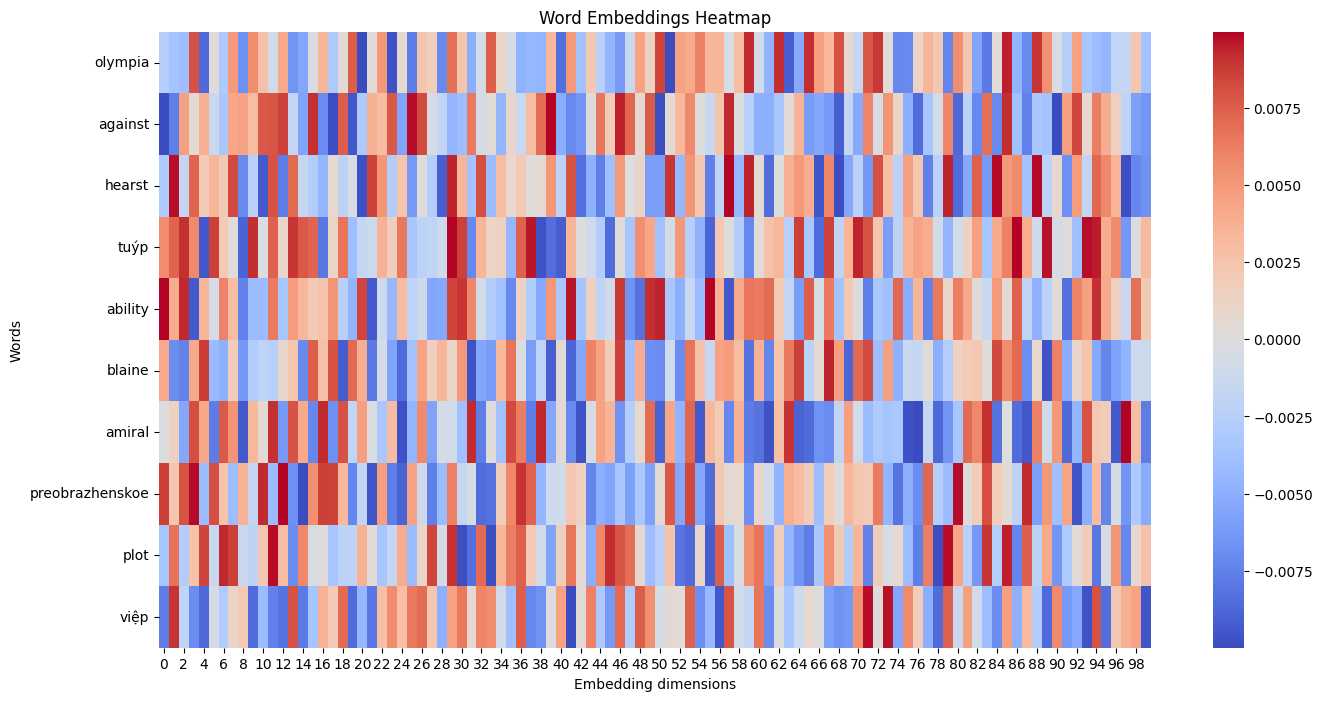

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(df, cmap="coolwarm", annot=False, cbar=True)
plt.title("Word Embeddings Heatmap")
plt.xlabel("Embedding dimensions")
plt.ylabel("Words")
plt.show()
